<a href="https://colab.research.google.com/github/ayush24578/Final-Assignment-Concepts-and-Technologies-of-AI-/blob/main/2507084_AyushDhungana_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('/content/Income_Survey_Dataset.csv')
df.head()

,PersonID,Weight,Province,MBMREGP,Age_gap,Gender,Marital_status,Highschool,Highest_edu,Work_ref,...,Pension,Self_emp_income.1,Total_income,Emp_insurance,Salary_wages,compensation,Family_mem,CFCOMP,CONDMP,RENTM
0,1,139.6500,59,38,15,2,3,1,3,2,...,0,0,20275,0,0,0,1,1,99999996,99999996
1,2,254.1041,35,17,9,1,1,1,2,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
2,3,254.1041,35,17,9,2,1,1,3,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
3,4,254.1041,35,17,4,1,4,2,1,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
4,5,254.1041,35,17,3,1,96,6,6,6,...,0,0,110875,0,106000,0,4,4,99999996,99999996


In [2]:
print("DataFrame Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum().sort_values(ascending=False).head(10))

print("\nDuplicate Rows:")
print(df.duplicated().sum())

print("\n'Total_income' Distribution:")
print(df['Total_income'].describe())

# Create 'Income_Class' target variable
median_income = df['Total_income'].median()
df['Income_Class'] = (df['Total_income'] > median_income).astype(int)
print(f"\nMedian Total_income used for classification: {median_income}")

print("\n'Income_Class' Distribution:")
print(df['Income_Class'].value_counts())
print(df['Income_Class'].value_counts(normalize=True))

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72643 entries, 0 to 72642
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PersonID           72643 non-null  int64  
 1   Weight             72643 non-null  float64
 2   Province           72643 non-null  int64  
 3   MBMREGP            72643 non-null  int64  
 4   Age_gap            72643 non-null  int64  
 5   Gender             72643 non-null  int64  
 6   Marital_status     72643 non-null  int64  
 7   Highschool         72643 non-null  int64  
 8   Highest_edu        72643 non-null  int64  
 9   Work_ref           72643 non-null  int64  
 10  Work_yearly        72643 non-null  int64  
 11  Emp_week_ref       72643 non-null  int64  
 12  Total_hour_ref     72643 non-null  int64  
 13  paid_emp_ref       72643 non-null  int64  
 14  self_emp_ref       72643 non-null  int64  
 15  Immigrant          72643 non-null  int64  
 16  Year_i

In [3]:
df = df.drop(['PersonID', 'Total_income'], axis=1)
print("Dropped 'PersonID' and 'Total_income' columns.")
print(df.head())

Dropped 'PersonID' and 'Total_income' columns.
     Weight  Province  MBMREGP  Age_gap  Gender  Marital_status  Highschool  \
0  139.6500        59       38       15       2               3           1   
1  254.1041        35       17        9       1               1           1   
2  254.1041        35       17        9       2               1           1   
3  254.1041        35       17        4       1               4           2   
4  254.1041        35       17        3       1              96           6   

   Highest_edu  Work_ref  Work_yearly  ...  Pension  Self_emp_income.1  \
0            3         2           30  ...        0                  0   
1            2         1           11  ...        0                  0   
2            3         1           11  ...        0                  0   
3            1         1           11  ...        0                  0   
4            6         6           96  ...        0                  0   

   Emp_insurance  Salary_wages  c

In [4]:
categorical_cols_to_convert = [
    'Gender', 'Marital_status', 'Province', 'Highschool', 'Highest_edu',
    'Work_ref', 'Immigrant', 'MBMREGP', 'Age_gap', 'Family_mem'
]

for col in categorical_cols_to_convert:
    if col in df.columns:
        df[col] = df[col].astype('category')

print("Converted numerical categorical columns to 'category' data type.")
print(df[categorical_cols_to_convert].dtypes)

Converted numerical categorical columns to 'category' data type.
Gender            category
Marital_status    category
Province          category
Highschool        category
Highest_edu       category
Work_ref          category
Immigrant         category
MBMREGP           category
Age_gap           category
Family_mem        category
dtype: object


In [5]:
import numpy as np

sentinel_values = [99999996, 100000000] # Assuming 100000000 might also be a sentinel based on typical large integer sentinels

for col in ['CONDMP', 'RENTM']:
    if col in df.columns:
        for sentinel in sentinel_values:
            df[col] = df[col].replace(sentinel, np.nan)

print("Replaced sentinel values in 'CONDMP' and 'RENTM' with NaN.")
print(df[['CONDMP', 'RENTM']].head())

Replaced sentinel values in 'CONDMP' and 'RENTM' with NaN.
   CONDMP  RENTM
0     NaN    NaN
1     NaN    NaN
2     NaN    NaN
3     NaN    NaN
4     NaN    NaN


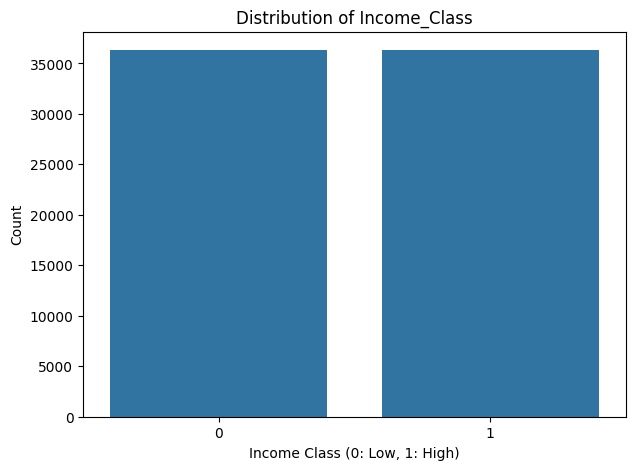

Count plot for 'Income_Class' displayed.


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.countplot(x='Income_Class', data=df)
plt.title('Distribution of Income_Class')
plt.xlabel('Income Class (0: Low, 1: High)')
plt.ylabel('Count')
plt.show()

print("Count plot for 'Income_Class' displayed.")

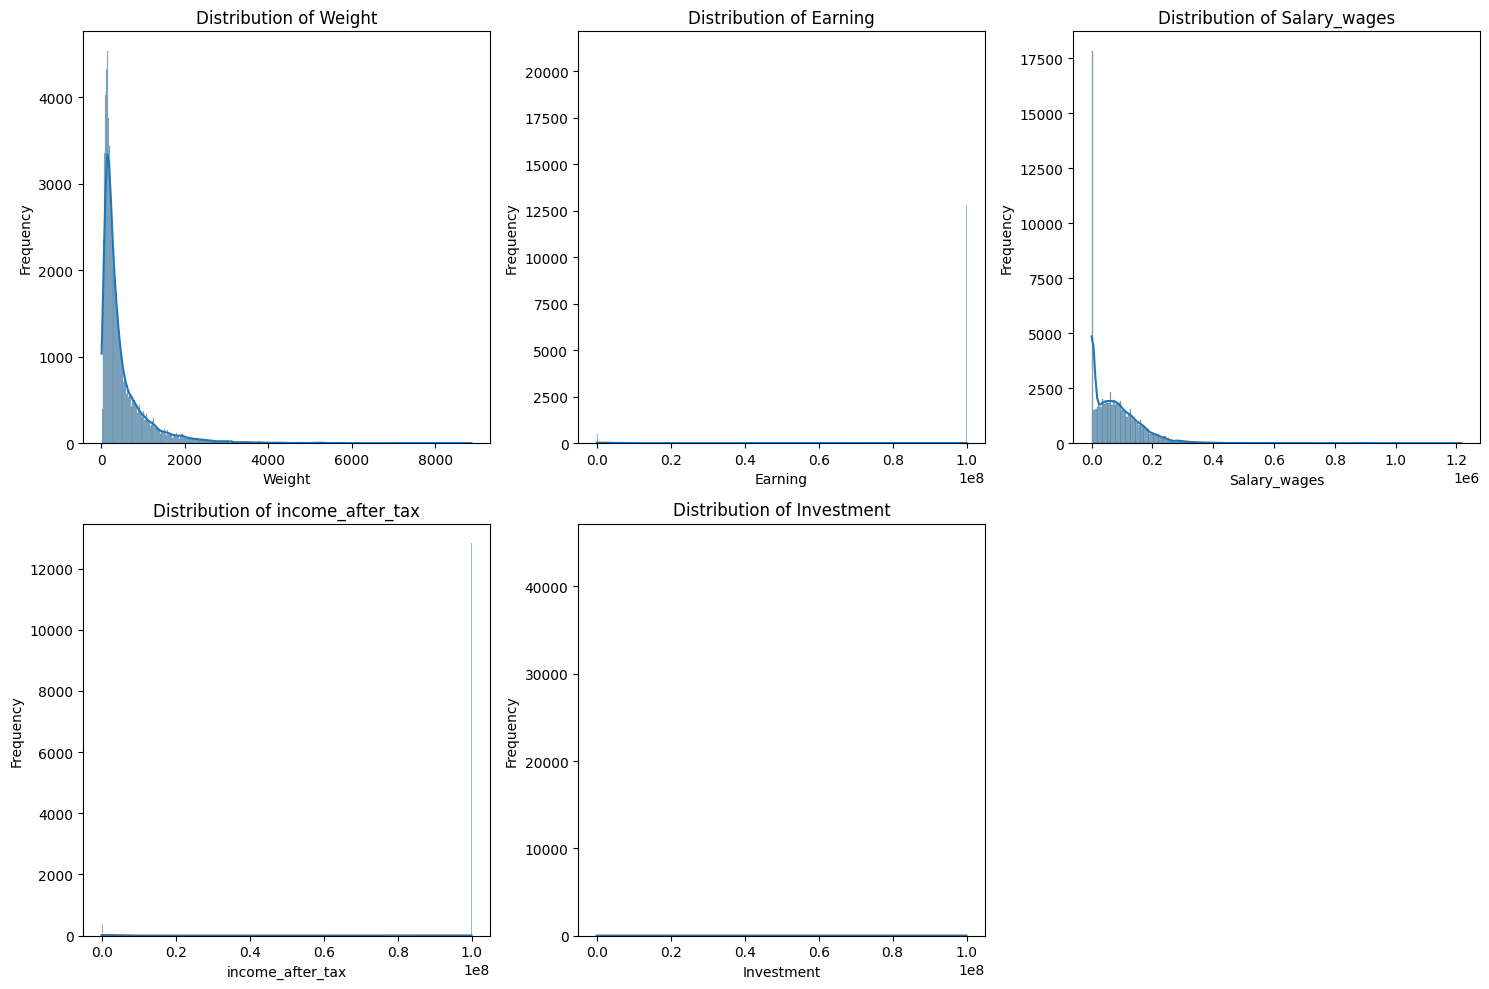

Histograms for selected numerical features displayed.


In [7]:
numerical_cols = [
    'Weight', 'Year_immigrant', 'income_after_tax', 'Cap_gain',
    'Childcare_expe', 'Child_benefit', 'CPP_QPP', 'Earning',
    'Guaranteed_income', 'Investment', 'Old_age_pension', 'Private_pension',
    'Self_emp_income', 'Pension', 'Self_emp_income.1', 'Emp_insurance',
    'Salary_wages', 'compensation'
]

# Filter for columns that actually exist in df
existing_numerical_cols = [col for col in numerical_cols if col in df.columns]

# Exclude 'CONDMP' and 'RENTM' as they had NaNs introduced and might be better handled separately or imputed first
existing_numerical_cols = [col for col in existing_numerical_cols if col not in ['CONDMP', 'RENTM']]

# Plot histograms for a selection of numerical features
# Selecting a subset to avoid too many plots at once, as requested 'e.g.'
selected_numerical_for_hist = ['Weight', 'Earning', 'Salary_wages', 'income_after_tax', 'Investment']

plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_numerical_for_hist):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid based on number of plots
    sns.histplot(df[col].dropna(), kde=True) # Use dropna() for columns that might have NaNs (like CONDMP/RENTM if included)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("Histograms for selected numerical features displayed.")

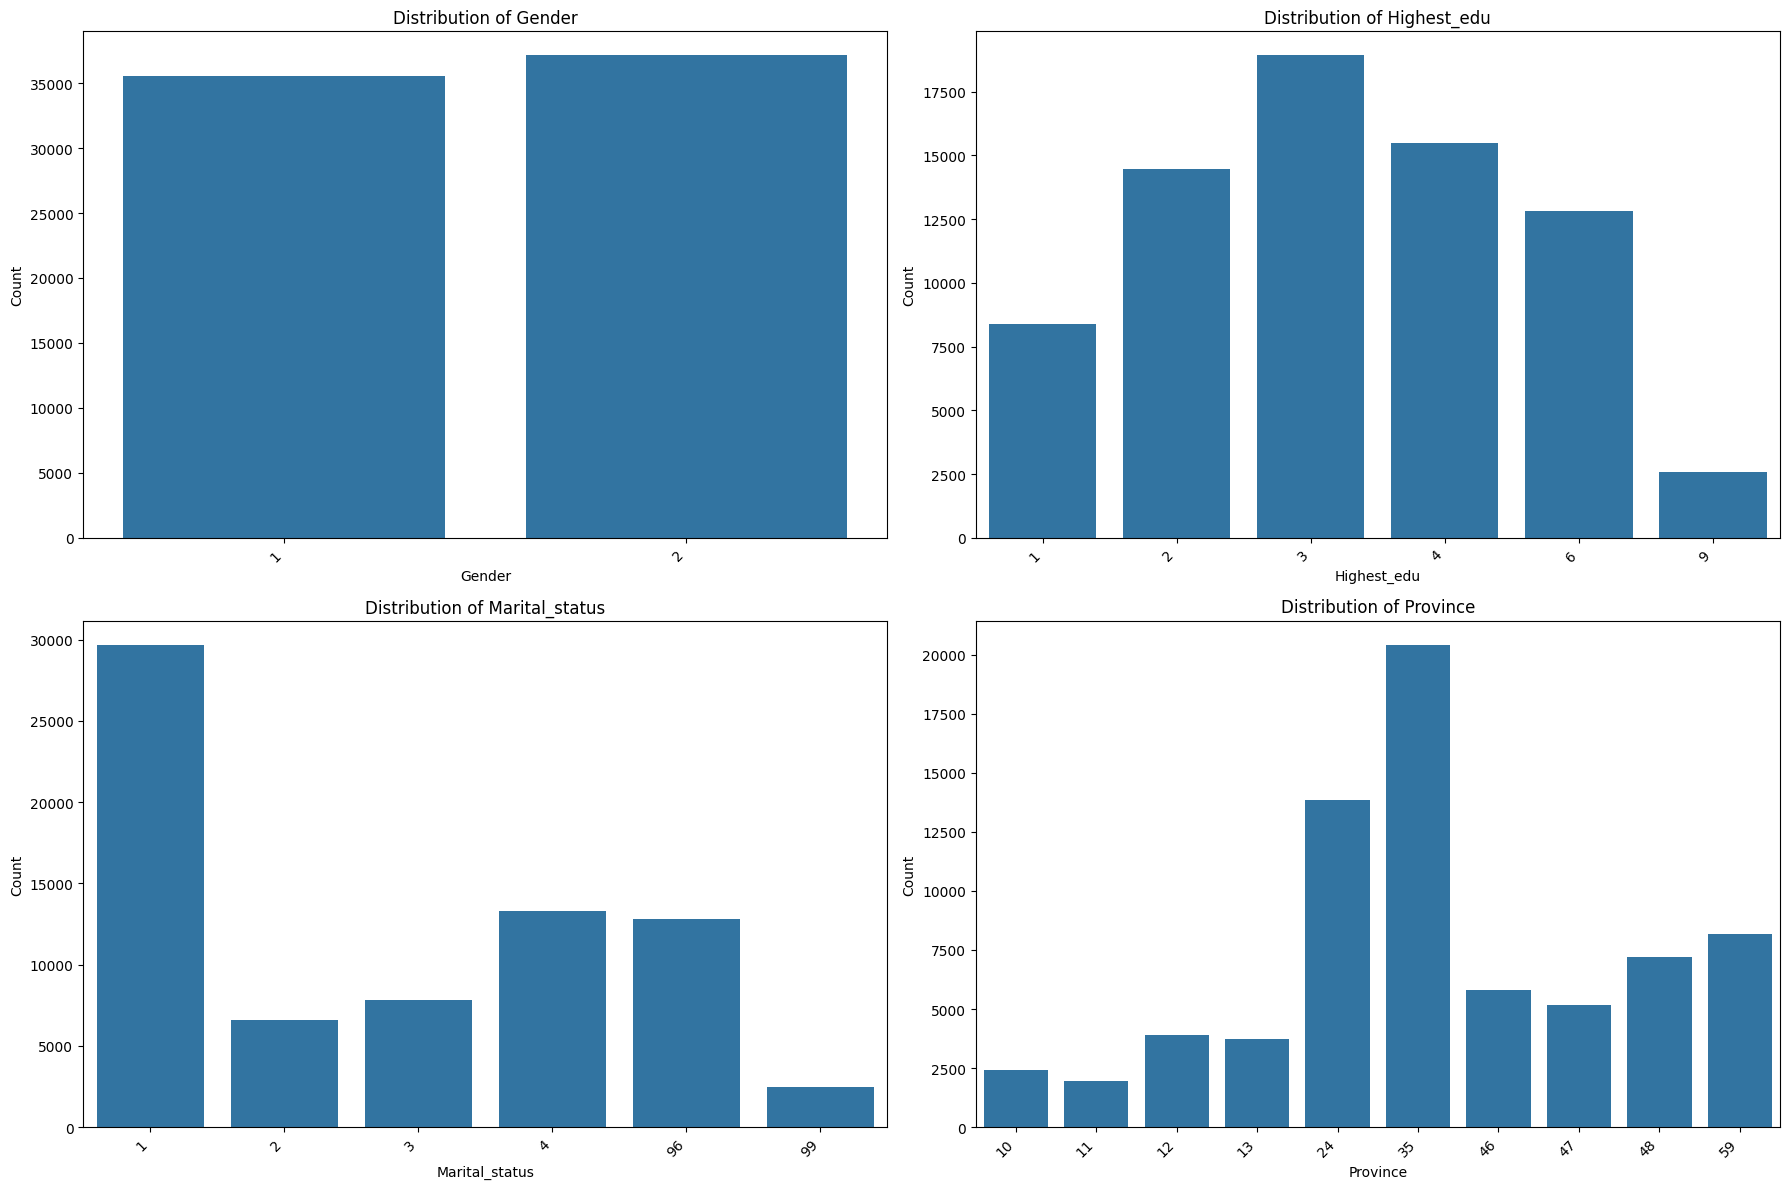

Bar plots for selected categorical features displayed.


In [8]:
selected_categorical_for_bar = ['Gender', 'Highest_edu', 'Marital_status', 'Province']

plt.figure(figsize=(18, 12))
for i, col in enumerate(selected_categorical_for_bar):
    plt.subplot(2, 2, i + 1) # Adjust subplot grid based on number of plots
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

print("Bar plots for selected categorical features displayed.")

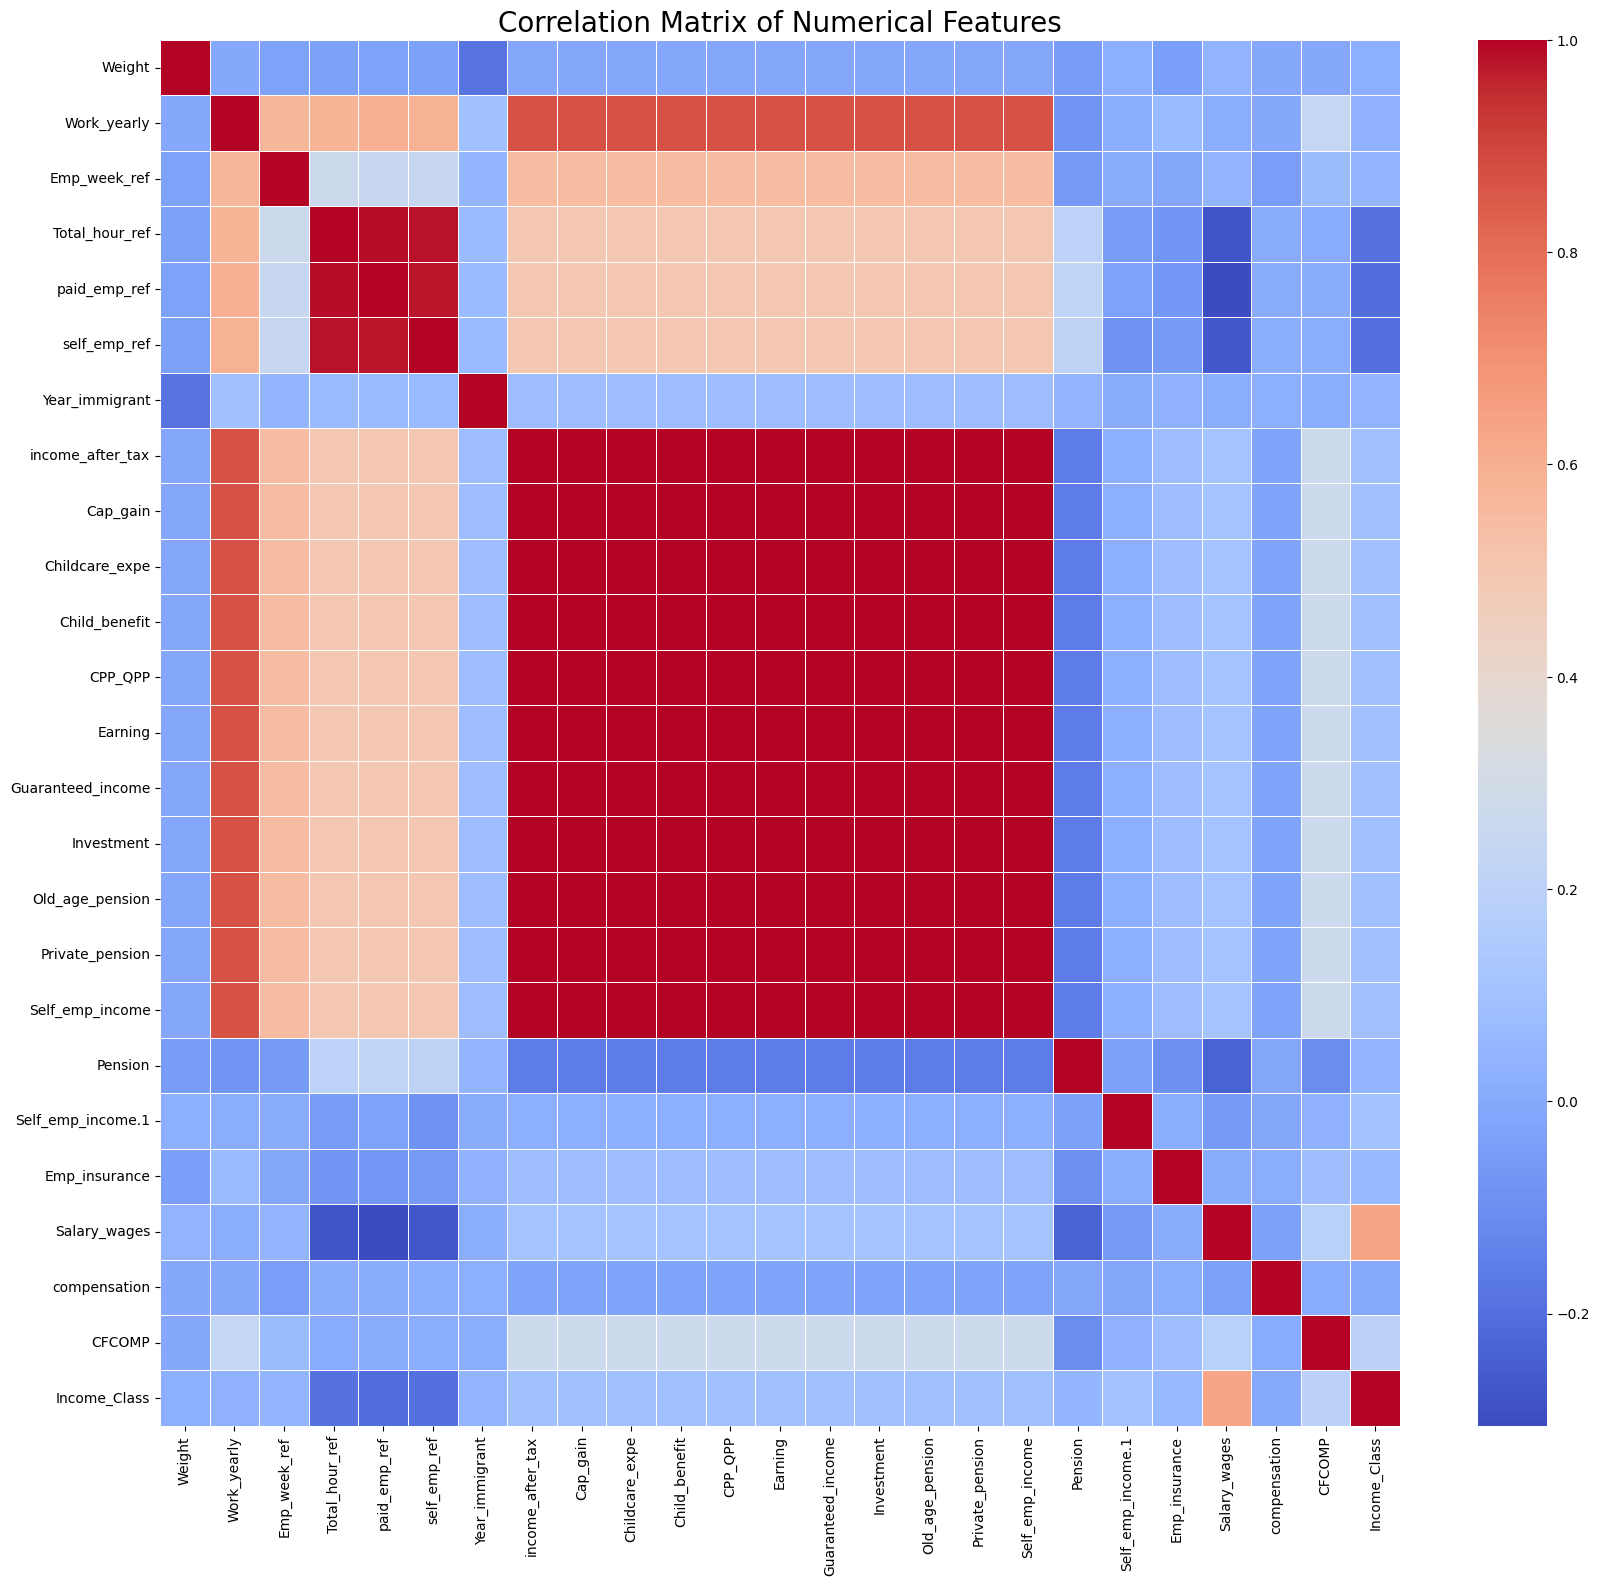

Correlation matrix heatmap for numerical features displayed.


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify numerical columns that are not categorical and do not have NaNs yet
# Exclude 'Income_Class' temporarily for correlation with other features, then add it back
numerical_features_for_corr = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove 'CONDMP' and 'RENTM' for correlation as they contain NaNs introduced earlier
numerical_features_for_corr = [col for col in numerical_features_for_corr if col not in ['CONDMP', 'RENTM']]

# Include 'Income_Class' in the correlation analysis as it's the target
if 'Income_Class' not in numerical_features_for_corr:
    numerical_features_for_corr.append('Income_Class')

# Calculate the correlation matrix
corr_matrix = df[numerical_features_for_corr].corr()

plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

print("Correlation matrix heatmap for numerical features displayed.")

In [10]:
categorical_cols = df.select_dtypes(include='category').columns.tolist()

# Exclude 'Income_Class' if it was mistakenly identified as categorical (it's int64 type)
if 'Income_Class' in categorical_cols:
    categorical_cols.remove('Income_Class')

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("One-hot encoding applied to categorical features.")
print(f"Original DataFrame shape: {df.shape}")
print(f"Encoded DataFrame shape: {df_encoded.shape}")
print(df_encoded.head())

One-hot encoding applied to categorical features.
Original DataFrame shape: (72643, 37)
Encoded DataFrame shape: (72643, 114)
     Weight  Work_yearly  Emp_week_ref  Total_hour_ref  paid_emp_ref  \
0  139.6500           30            96            9996             6   
1  254.1041           11            52            2080             1   
2  254.1041           11            52            2080             1   
3  254.1041           11            52            2080             1   
4  254.1041           96            96            9996             6   

   self_emp_ref  Year_immigrant  income_after_tax  Cap_gain  Childcare_expe  \
0             6               6             20275         0               0   
1             2               6             61680         0               0   
2             2               6             26875         0               0   
3             2               6             14000         0               0   
4             6               6          99999

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Separate features (X) and target (y)
X = df_encoded.drop('Income_Class', axis=1)
y = df_encoded['Income_Class']

# Identify numerical columns in X (excluding boolean columns created by one-hot encoding)
# Select columns that are not boolean (created by get_dummies for categorical features) and are numerical
numerical_features = X.select_dtypes(include=np.number).columns.tolist()

# Handle NaN values in numerical columns (specifically 'CONDMP' and 'RENTM') using mean imputation
# Create an imputer that fills missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Apply imputation to the numerical features in X
X[numerical_features] = imputer.fit_transform(X[numerical_features])

# Apply StandardScaler to the numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

print("Numerical features scaled and NaNs imputed.")
print(f"Scaled features (X) shape: {X.shape}")
print(X.head())


Numerical features scaled and NaNs imputed.
Scaled features (X) shape: (72643, 113)
     Weight  Work_yearly  Emp_week_ref  Total_hour_ref  paid_emp_ref  \
0 -0.590332    -0.175617      1.184708        1.072182      1.075995   
1 -0.406412    -0.768257     -0.110376       -0.823443     -0.972304   
2 -0.406412    -0.768257     -0.110376       -0.823443     -0.972304   
3 -0.406412    -0.768257     -0.110376       -0.823443     -0.972304   
4 -0.406412     1.883027      1.184708        1.072182      1.075995   

   self_emp_ref  Year_immigrant  income_after_tax  Cap_gain  Childcare_expe  \
0      1.072879        0.166997         -0.463675 -0.463121       -0.463107   
1     -0.845456        0.166997         -0.462588 -0.463121       -0.463107   
2     -0.845456        0.166997         -0.463501 -0.463121       -0.463107   
3     -0.845456        0.166997         -0.463839 -0.463121       -0.463107   
4      1.072879        0.166997          2.159362  2.159363        2.159363   

   ...  

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("Data split into training and testing sets.")

X_train shape: (58114, 113)
X_test shape: (14529, 113)
y_train shape: (58114,)
y_test shape: (14529,)
Data split into training and testing sets.


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Necessary modules imported for MLP model implementation.")

Necessary modules imported for MLP model implementation.


In [14]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

print("MLP model architecture defined.")
model.summary()

MLP model architecture defined.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         7,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,409 (36.75 KB)

 Trainable params: 9,409 (36.75 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("MLP model compiled.")

MLP model compiled.


In [16]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

print("MLP model trained.")

Epoch 1/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8613 - loss: 0.3149 - val_accuracy: 0.9335 - val_loss: 0.1747
Epoch 2/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9366 - loss: 0.1668 - val_accuracy: 0.9377 - val_loss: 0.1644
Epoch 3/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9415 - loss: 0.1544 - val_accuracy: 0.9387 - val_loss: 0.1555
Epoch 4/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9441 - loss: 0.1466 - val_accuracy: 0.9390 - val_loss: 0.1587
Epoch 5/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9454 - loss: 0.1453 - val_accuracy: 0.9413 - val_loss: 0.1530
Epoch 6/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9484 - loss: 0.1383 - val_accuracy: 0.9354 - val_loss: 0.1708
Epoch 7/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9475 - loss: 0.1379 - val_accuracy: 0.9406 - val_loss: 0.1517
Epoch 8/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9473 - loss: 0.1355 - 

In [17]:
y_pred_proba = model.predict(X_test)
print("Predicted probabilities on test set.")
print(y_pred_proba[:5])

455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Predicted probabilities on test set.
[[1.        ]
 [0.9028768 ]
 [1.        ]
 [0.00356043]
 [1.        ]]


In [18]:
y_pred_mlp = (y_pred_proba > 0.5).astype(int)
print("Converted predicted probabilities to binary class labels.")
print(y_pred_mlp[:5])

Converted predicted probabilities to binary class labels.
[[1]
 [1]
 [1]
 [0]
 [1]]


In [19]:
accuracy = accuracy_score(y_test, y_pred_mlp)
precision = precision_score(y_test, y_pred_mlp)
recall = recall_score(y_test, y_pred_mlp)
f1 = f1_score(y_test, y_pred_mlp)
conf_matrix = confusion_matrix(y_test, y_pred_mlp)

print(f"\nMLP Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"\nConfusion Matrix:\n{conf_matrix}")


MLP Model Performance:
Accuracy: 0.9457
Precision: 0.9601
Recall: 0.9301
F1-Score: 0.9448

Confusion Matrix:
[[6984  281]
 [ 508 6756]]


In [20]:
from sklearn.linear_model import LogisticRegression

print("LogisticRegression imported successfully.")

LogisticRegression imported successfully.


In [21]:
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')

print("Logistic Regression model initialized.")

Logistic Regression model initialized.


In [22]:
log_reg_model.fit(X_train, y_train)

print("Logistic Regression model trained.")

Logistic Regression model trained.


In [23]:
y_pred_lr = log_reg_model.predict(X_test)

print("Predictions made on the test set for Logistic Regression model.")
print(y_pred_lr[:5])

Predictions made on the test set for Logistic Regression model.
[1 1 1 0 1]


In [24]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

print(f"\nLogistic Regression Model Performance:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")
print(f"\nConfusion Matrix:\n{conf_matrix_lr}")


Logistic Regression Model Performance:
Accuracy: 0.9390
Precision: 0.9448
Recall: 0.9325
F1-Score: 0.9386

Confusion Matrix:
[[6869  396]
 [ 490 6774]]


In [25]:
from sklearn.ensemble import RandomForestClassifier

print("RandomForestClassifier imported successfully.")

RandomForestClassifier imported successfully.


In [26]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100) # Using default n_estimators for now

print("Random Forest model initialized.")

Random Forest model initialized.


In [27]:
rf_model.fit(X_train, y_train)

print("Random Forest model trained.")

Random Forest model trained.


In [28]:
y_pred_rf = rf_model.predict(X_test)

print("Predictions made on the test set for Random Forest model.")
print(y_pred_rf[:5])

Predictions made on the test set for Random Forest model.
[1 1 1 0 1]


In [29]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"\nConfusion Matrix:\n{conf_matrix_rf}")


Random Forest Model Performance:
Accuracy: 0.9568
Precision: 0.9693
Recall: 0.9434
F1-Score: 0.9562

Confusion Matrix:
[[7048  217]
 [ 411 6853]]


In [30]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga']
}

# Initialize GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(estimator=log_reg_model, param_grid=param_grid_lr, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search_lr.fit(X_train, y_train)

# Print the best parameters and best score for Logistic Regression
print("\nBest parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best F1-score for Logistic Regression:", grid_search_lr.best_score_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits

Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'saga'}
Best F1-score for Logistic Regression: 0.9344196177776475


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Logistic Regression (re-included with max_iter for robustness)
# The previous run produced a ConvergenceWarning for 'saga' solver, which is addressed by increasing max_iter.
# 'liblinear' solver will ignore the max_iter parameter without issue.
param_grid_lr = {
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000, 2000] # Increased max_iter to address ConvergenceWarning for 'saga'
}

# Re-initialize Logistic Regression model (without solver specified, so GridSearchCV can manage it)
log_reg_model_robust = LogisticRegression(random_state=42)

# Initialize GridSearchCV for Logistic Regression with updated parameters
grid_search_lr = GridSearchCV(estimator=log_reg_model_robust, param_grid=param_grid_lr, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search_lr.fit(X_train, y_train)

# Print the best parameters and best score for Logistic Regression
print("\nBest parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best F1-score for Logistic Regression:", grid_search_lr.best_score_)


# Define parameter grid for Random Forest Classifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None] # None means full depth
}

# Initialize RandomForestClassifier model
rf_model_grid = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=rf_model_grid, param_grid=param_grid_rf, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and best score for Random Forest
print("\nBest parameters for Random Forest:", grid_search_rf.best_params_)
print("Best F1-score for Random Forest:", grid_search_rf.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters for Logistic Regression: {'C': 0.1, 'max_iter': 1000, 'solver': 'saga'}
Best F1-score for Logistic Regression: 0.934442480565356
Fitting 5 folds for each of 9 candidates, totalling 45 fits

Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 200}
Best F1-score for Random Forest: 0.9511176201153908


In [32]:
from sklearn.feature_selection import SelectFromModel

# Get the best Random Forest model from the hyperparameter optimization step
best_rf_model = grid_search_rf.best_estimator_

print("SelectFromModel imported and best Random Forest model retrieved.")

SelectFromModel imported and best Random Forest model retrieved.


In [33]:
sfm = SelectFromModel(best_rf_model, prefit=True)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

print(f"Original X_train shape: {X_train.shape}")
print(f"Selected X_train shape: {X_train_selected.shape}")
print(f"Original X_test shape: {X_test.shape}")
print(f"Selected X_test shape: {X_test_selected.shape}")
print(f"Number of features selected: {X_train_selected.shape[1]}")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Original X_train shape: (58114, 113)
Selected X_train shape: (58114, 17)
Original X_test shape: (14529, 113)
Selected X_test shape: (14529, 17)
Number of features selected: 17


In [34]:
sfm = SelectFromModel(best_rf_model, prefit=True)
X_train_selected = sfm.transform(X_train.values)
X_test_selected = sfm.transform(X_test.values)

print(f"Original X_train shape: {X_train.shape}")
print(f"Selected X_train shape: {X_train_selected.shape}")
print(f"Original X_test shape: {X_test.shape}")
print(f"Selected X_test shape: {X_test_selected.shape}")
print(f"Number of features selected: {X_train_selected.shape[1]}")

Original X_train shape: (58114, 113)
Selected X_train shape: (58114, 17)
Original X_test shape: (14529, 113)
Selected X_test shape: (14529, 17)
Number of features selected: 17


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Retrieve the best estimator for Logistic Regression
best_lr_model = grid_search_lr.best_estimator_

# 2. Train this best Logistic Regression model using the feature-selected training data
best_lr_model.fit(X_train_selected, y_train)

print("Retrained Best Logistic Regression model with selected features.")

# 3. Make predictions on the feature-selected test data
y_pred_lr_selected = best_lr_model.predict(X_test_selected)

# 4. Calculate and print performance metrics
accuracy_lr_selected = accuracy_score(y_test, y_pred_lr_selected)
precision_lr_selected = precision_score(y_test, y_pred_lr_selected)
recall_lr_selected = recall_score(y_test, y_pred_lr_selected)
f1_lr_selected = f1_score(y_test, y_pred_lr_selected)
conf_matrix_lr_selected = confusion_matrix(y_test, y_pred_lr_selected)

print(f"\nRetrained Logistic Regression Model Performance (Selected Features):")
print(f"Accuracy: {accuracy_lr_selected:.4f}")
print(f"Precision: {precision_lr_selected:.4f}")
print(f"Recall: {recall_lr_selected:.4f}")
print(f"F1-Score: {f1_lr_selected:.4f}")
print(f"\nConfusion Matrix:\n{conf_matrix_lr_selected}")

Retrained Best Logistic Regression model with selected features.

Retrained Logistic Regression Model Performance (Selected Features):
Accuracy: 0.9306
Precision: 0.9343
Recall: 0.9262
F1-Score: 0.9302

Confusion Matrix:
[[6792  473]
 [ 536 6728]]


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 5. Retrieve the best estimator for Random Forest
best_rf_model_selected = grid_search_rf.best_estimator_

# 6. Train this best Random Forest model using the feature-selected training data
best_rf_model_selected.fit(X_train_selected, y_train)

print("Retrained Best Random Forest model with selected features.")

# 7. Make predictions on the feature-selected test data
y_pred_rf_selected = best_rf_model_selected.predict(X_test_selected)

# 8. Calculate and print performance metrics
accuracy_rf_selected = accuracy_score(y_test, y_pred_rf_selected)
precision_rf_selected = precision_score(y_test, y_pred_rf_selected)
recall_rf_selected = recall_score(y_test, y_pred_rf_selected)
f1_rf_selected = f1_score(y_test, y_pred_rf_selected)
conf_matrix_rf_selected = confusion_matrix(y_test, y_pred_rf_selected)

print(f"\nRetrained Random Forest Model Performance (Selected Features):")
print(f"Accuracy: {accuracy_rf_selected:.4f}")
print(f"Precision: {precision_rf_selected:.4f}")
print(f"Recall: {recall_rf_selected:.4f}")
print(f"F1-Score: {f1_rf_selected:.4f}")
print(f"\nConfusion Matrix:\n{conf_matrix_rf_selected}")

Retrained Best Random Forest model with selected features.

Retrained Random Forest Model Performance (Selected Features):
Accuracy: 0.9650
Precision: 0.9730
Recall: 0.9565
F1-Score: 0.9647

Confusion Matrix:
[[7072  193]
 [ 316 6948]]


In [37]:
model_performance = []

# 1. MLP Model Performance
mlp_metrics = {
    'Model': 'MLP',
    'CV F1-Score': 'N/A', # MLP's CV score is not directly comparable here as it wasn't cross-validated with GridSearchCV
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}
model_performance.append(mlp_metrics)

print("MLP model metrics added to performance list.")

MLP model metrics added to performance list.


In [38]:
lr_metrics = {
    'Model': 'Logistic Regression (Optimized & FS)',
    'CV F1-Score': grid_search_lr.best_score_,
    'Accuracy': accuracy_lr_selected,
    'Precision': precision_lr_selected,
    'Recall': recall_lr_selected,
    'F1-Score': f1_lr_selected
}
model_performance.append(lr_metrics)

print("Logistic Regression model metrics added to performance list.")

Logistic Regression model metrics added to performance list.


In [39]:
rf_metrics = {
    'Model': 'Random Forest (Optimized & FS)',
    'CV F1-Score': grid_search_rf.best_score_,
    'Accuracy': accuracy_rf_selected,
    'Precision': precision_rf_selected,
    'Recall': recall_rf_selected,
    'F1-Score': f1_rf_selected
}
model_performance.append(rf_metrics)

print("Random Forest model metrics added to performance list.")

Random Forest model metrics added to performance list.


In [41]:
import pandas as pd

performance_df = pd.DataFrame(model_performance)
print("Model Performance Comparison Table:")
print(performance_df)

Model Performance Comparison Table:
                                  Model CV F1-Score  Accuracy  Precision  \
0                                   MLP         N/A  0.945695   0.960068   
1  Logistic Regression (Optimized & FS)    0.934442  0.930553   0.934315   
2        Random Forest (Optimized & FS)    0.951118  0.964967   0.972973   

     Recall  F1-Score  
0  0.930066  0.944829  
1  0.926211  0.930245  
2  0.956498  0.964665  
